## Çoklu Doğrusal Regresyon ile Reklamların Satışlara Etkisini İnceleme

Multiple Linear Regression

Elimizde farklı reklam kaynaklarına yapılan harcamalar ve satış mikrtarlarını gösteren bir veris seti var. Regresyon modeli oluşturarak hangi reklem kanalaını satışlar üzerinde etkisinin daha fazla olduğunu belirleyeceğiz.

## Kütüphaneleri yükle

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Veri dosyasını yükle

In [7]:
ls

 Volume in drive D is Depo
 Volume Serial Number is EE9B-2485

 Directory of D:\yapayzeka\yapay zeka bootcamp\zafer_projeler\ders7_makine ”§renmesi

03.07.2024  15:10    <DIR>          .
03.07.2024  15:10    <DIR>          ..
03.07.2024  15:10    <DIR>          .ipynb_checkpoints
03.07.2024  15:09             4.063 advertising.csv
03.07.2024  15:10           100.706 Coklu dogrusal  Regresyon.ipynb
               2 File(s)        104.769 bytes
               3 Dir(s)  88.189.218.816 bytes free


In [8]:
df=pd.read_csv('advertising.csv')

In [9]:
#Veri ön işleme ve EDA
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


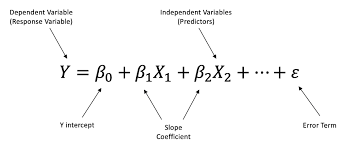

In [11]:
#Bu formülün katsayılarını ve sabit sayıalrını bulmaya çalışıyoruz
#satışlar= Sabit+ katsayı1*Tv+ katsayı2*Radio+ katsayı3*Newspaper + Hata 

In [12]:
df.info() #eksik veri yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
#korelasyon
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

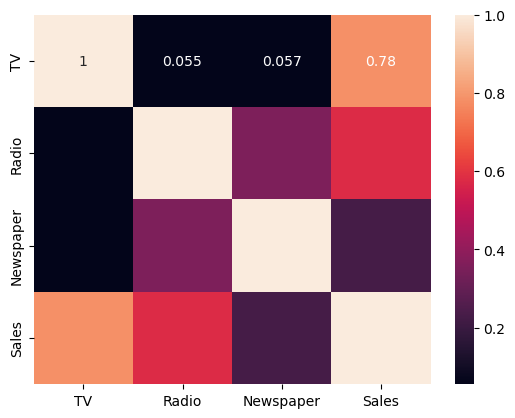

In [14]:
#Isı haritası yap
sns.heatmap(df.corr(),annot=True)

In [15]:
#Regresyon ve veri önişleme kütüpahneleri yükle

#veri setini eğitim ve test olarak bölmek için kütüphane
from sklearn.model_selection import train_test_split

#Ölçeklendirme kütüphanesi içe aktar
from sklearn.preprocessing import StandardScaler as Scaler

#lineer regresyon modelini içe aktar
from sklearn.linear_model import LinearRegression

#Modeli değerlendirmek için metrikler
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
# Özellikler ve hedef sütunlarını belirleyeceğiz
X=df[['TV','Radio','Newspaper']] #X=df.drop('Sales',axis=1)
y=df['Sales']

In [17]:
#Veri setini eğitim ve test olarak ayır
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2,#test verisinin büyüklüğü %20
                                               random_state=42) 
# random_state=42 Rastgele olarak belirle ama 42  kullanan herkese aynı sonuçları ver

In [18]:
#Model oluşturma
lr=LinearRegression() #bir linear regresyon nenseni oluştur

In [34]:
#modeli fit et eğit
lr.fit(X_train,y_train) #eğitim setinin X ve y sini ver

LinearRegression()

In [20]:
#Tahminleri yap
y_predict=lr.predict(X_test)

In [21]:
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [22]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [23]:
#modelin tahminleri ve gerçek değerlerin karşılaştırılması
model_predict_actual=pd.DataFrame({'Gerçek':y_test,'Tahmin':y_predict})
model_predict_actual

,Gerçek,Tahmin
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [24]:
#Hatayı da sütun oalrak ekle
model_predict_actual['Error']=abs(model_predict_actual['Gerçek']-model_predict_actual['Tahmin'])
model_predict_actual

,Gerçek,Tahmin,Error
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,0.153843
158,7.3,10.608503,3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,2.106346
45,14.9,15.155070,0.255070


In [25]:
#modeli değerlendir
print ("R2 Score : ",r2_score(y_test,y_predict)) 
#r2_score(y_test,y_predict) gerçek değerlerle tahminleri karşılaştır

R2 Score :  0.899438024100912


In [26]:
#RMSE Hata Kareler Ortalaması
print("RMSE : ",mean_squared_error(y_test,y_predict)**.5)

RMSE :  1.7815996615334502


In [27]:
df['Sales'].mean()

14.0225

In [28]:
df['TV'].mean(),df['Radio'].mean(),df['Newspaper'].mean()

(147.0425, 23.264000000000006, 30.553999999999995)

#R2 1 e oldukça yakın iyi bir model olduğu söylenebilir.
#Ortalamna satış miktarı 14 ken RMSE 1.78 

In [30]:
#Bu formülün katsayılarını ve sabit sayıalrını bulmaya çalışıyoruz
#satışlar= Sabit+ katsayı1*Tv+ katsayı2*Radio+ katsayı3*Newspaper + Hata 
#TV Radyo Newspaper

In [31]:
#Katsayılar
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [32]:
#Sabit terim
lr.intercept_

2.979067338122629

In [33]:
# Örnek üzerinden uygulama 
satış=2.98+0.044*TV+0.19*Radio+0.00*Newspaper
#180.8	10.8	58.4	12.9

NameError: name 'TV' is not defined

In [ ]:
2.98+181*0.044+11*0.19+58*0.002

In [ ]:
#Gerçek değer: 12.9 Tahmin: 13.15

In [ ]:
#Yunus Emre'den İstatisik model oalrak açıklaması
import statsmodels.formula.api as sm
model=sm.ols(formula="Sales~TV+Radio+Newspaper",data=df).fit()
coef=model.params
fit=coef[0]+coef[1]*df.TV+coef[2]*df.Radio+coef[3]*df.Newspaper
res=df.Sales-fit
print(fit)
print(res)
print(model.summary())